### Filtering Transportation / Income Data

https://datacommon.mapc.org/browser/datasets/33 \
https://data.boston.gov/dataset/neighborhood-demographics/resource/d8c23c6a-b868-4ba4-8a3b-b9615a21be07 \
https://data.boston.gov/dataset/neighborhood-demographics/resource/d8c23c6a-b868-4ba4-8a3b-b9615a21be07

Above are the sources used to give early insights into any correlations or patterns within the realm of income-based commutes and displacement. 

/var/folders/2y/kltst65s5v9_rc09rl3t1z4h0000gn/T/ipykernel_1340/1900852835.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brookline_rent_data['med_c_r'] = pd.to_numeric(brookline_rent_data['med_c_r'], errors='coerce')
/var/folders/2y/kltst65s5v9_rc09rl3t1z4h0000gn/T/ipykernel_1340/1900852835.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brookline_rent_data.dropna(subset=['med_c_r'], inplace=True)


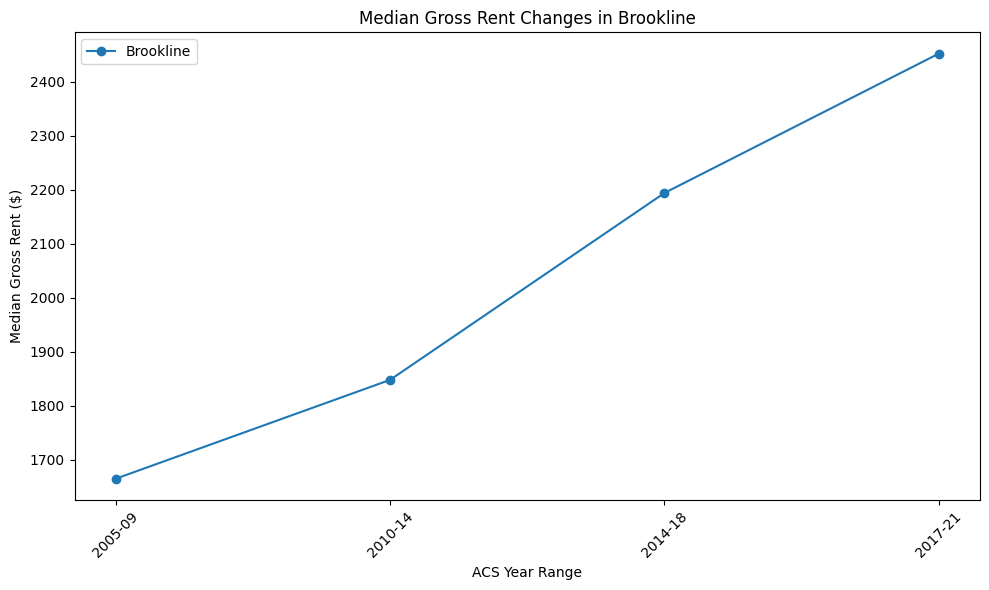

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

file_path = 'gross_rent.csv'
rent_data = pd.read_csv(file_path)

# print(rent_data.columns)
# print(rent_data.head())

brookline_rent_data = rent_data[rent_data['municipal'] == 'Brookline']

brookline_rent_data['med_c_r'] = pd.to_numeric(brookline_rent_data['med_c_r'], errors='coerce')
brookline_rent_data.dropna(subset=['med_c_r'], inplace=True)

# Creating a pivot table for Brookline
pivot_brookline_rent_data = brookline_rent_data.pivot(index='municipal', columns='acs_year', values='med_c_r')

plt.figure(figsize=(10, 6))
# Plotting the median gross rent changes for Brookline
plt.plot(pivot_brookline_rent_data.columns, pivot_brookline_rent_data.loc['Brookline'], marker='o', label='Brookline')

plt.title('Median Gross Rent Changes in Brookline')
plt.xlabel('ACS Year Range')
plt.ylabel('Median Gross Rent ($)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# rent_data['med_c_r'] = pd.to_numeric(rent_data['med_c_r'], errors='coerce') 

# rent_data.dropna(subset=['med_c_r'], inplace=True) 

# pivot_rent_data = rent_data.pivot(index='municipal', columns='acs_year', values='med_c_r')

# import matplotlib.pyplot as plt

# plt.figure(figsize=(10, 6))
# for municipality in pivot_rent_data.index:
#     plt.plot(pivot_rent_data.columns, pivot_rent_data.loc[municipality], marker='o', label=municipality)

# plt.title('Median Gross Rent Changes by Municipality')
# plt.xlabel('ACS Year Range')
# plt.ylabel('Median Gross Rent ($)')
# plt.legend(loc='best', fontsize='xx-small')
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()

['Allston', 'Dorchester', 'East Boston', 'Fenway', 'Longwood', 'Mattapan', 'Mission Hill', 'Roxbury']
['Boston', 'Brighton', 'Hyde Park']
['Back Bay', 'Beacon Hill', 'Charlestown', 'Downtown', 'Jamaica Plain', 'North End', 'Roslindale', 'South Boston', 'South Boston Waterfront', 'South End', 'West End', 'West Roxbury']


/var/folders/2y/kltst65s5v9_rc09rl3t1z4h0000gn/T/ipykernel_1340/3165666085.py:87: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ax = merged_data.groupby('Income_Category')[perc_column].mean().plot(kind='bar')


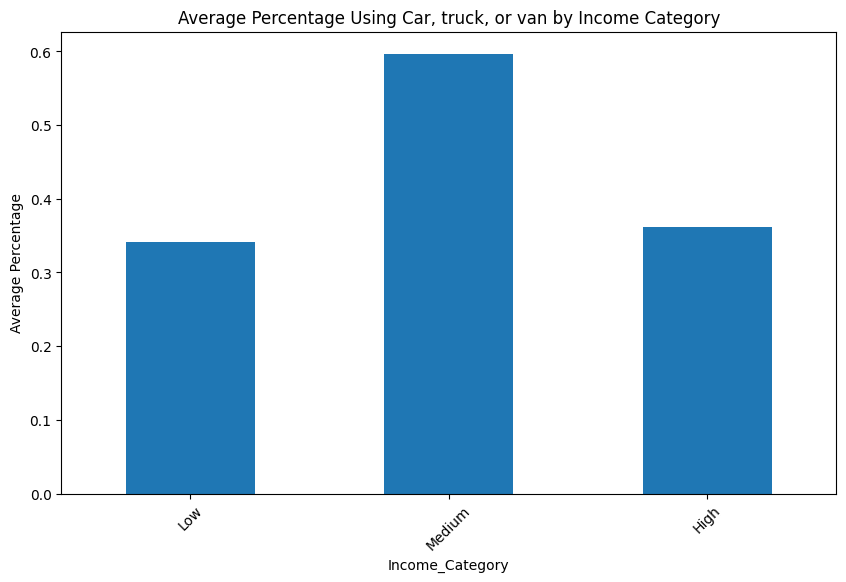

/var/folders/2y/kltst65s5v9_rc09rl3t1z4h0000gn/T/ipykernel_1340/3165666085.py:87: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ax = merged_data.groupby('Income_Category')[perc_column].mean().plot(kind='bar')


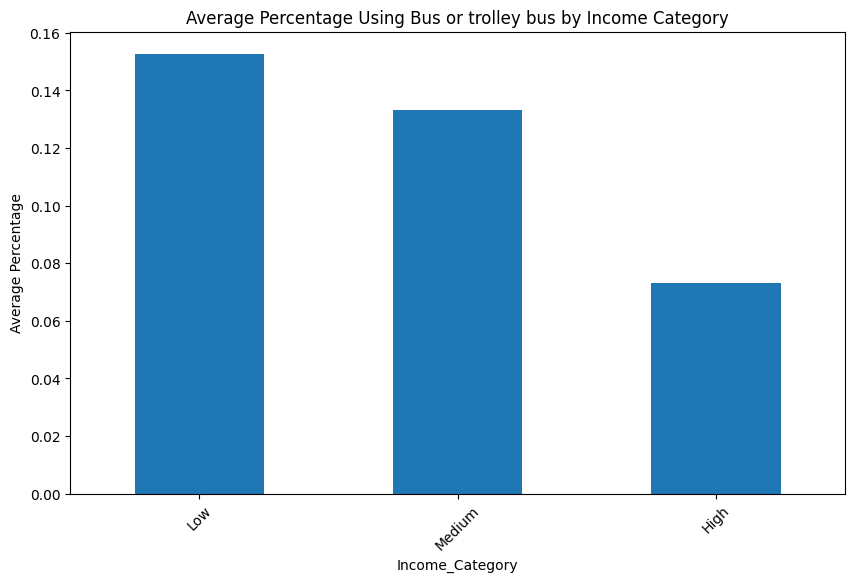

/var/folders/2y/kltst65s5v9_rc09rl3t1z4h0000gn/T/ipykernel_1340/3165666085.py:87: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ax = merged_data.groupby('Income_Category')[perc_column].mean().plot(kind='bar')


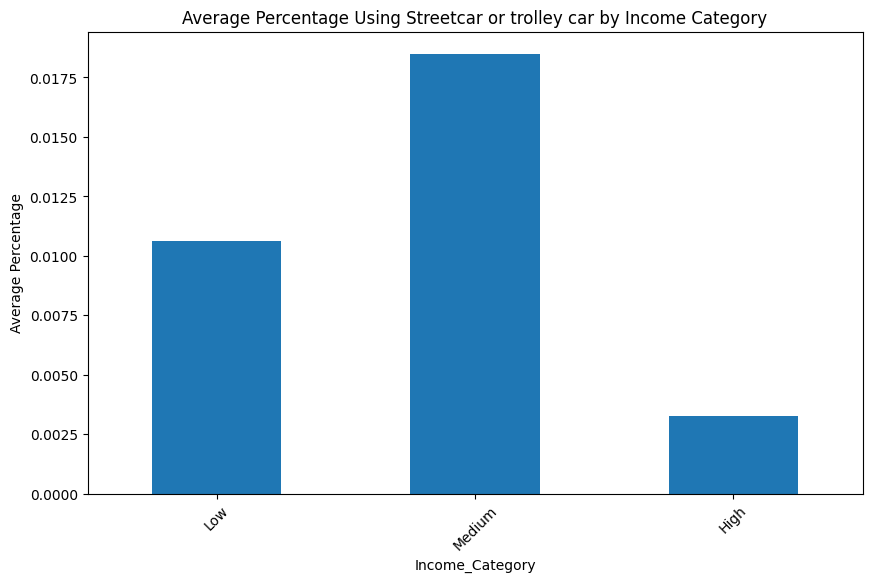

/var/folders/2y/kltst65s5v9_rc09rl3t1z4h0000gn/T/ipykernel_1340/3165666085.py:87: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ax = merged_data.groupby('Income_Category')[perc_column].mean().plot(kind='bar')


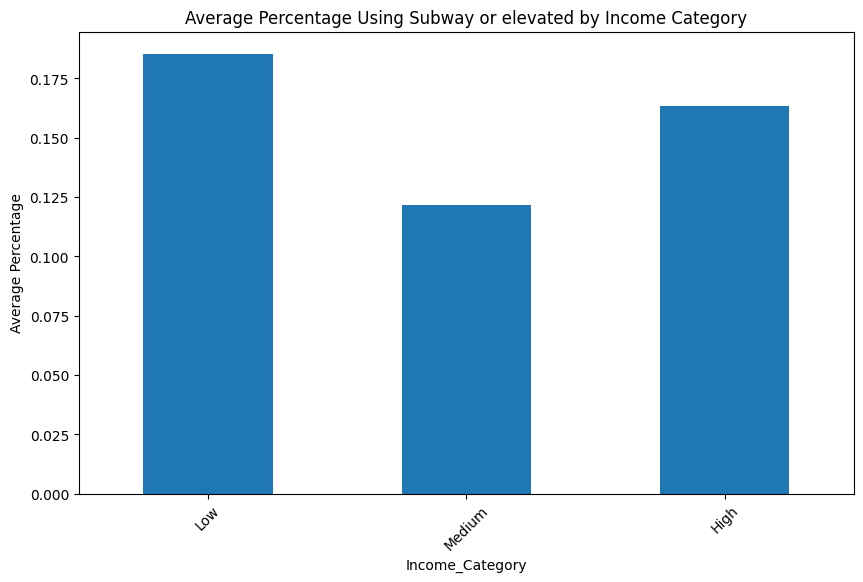

/var/folders/2y/kltst65s5v9_rc09rl3t1z4h0000gn/T/ipykernel_1340/3165666085.py:87: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ax = merged_data.groupby('Income_Category')[perc_column].mean().plot(kind='bar')


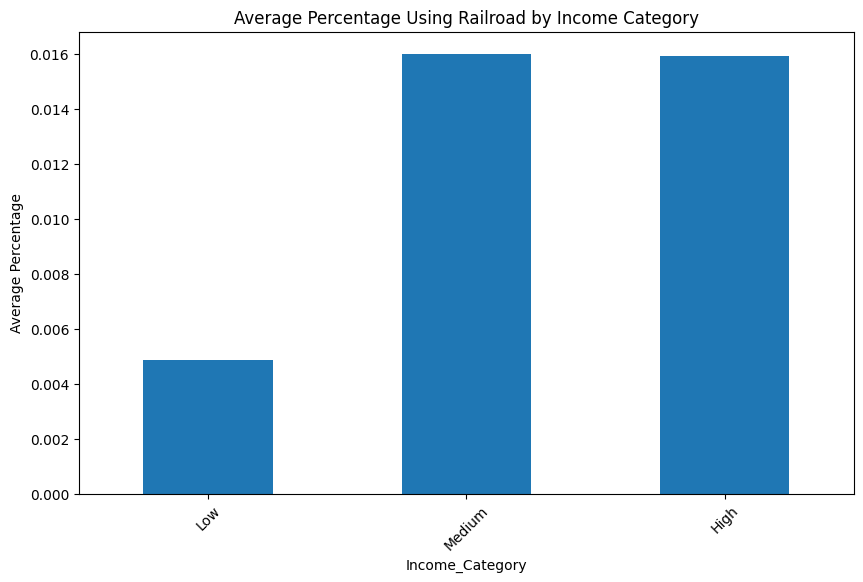

/var/folders/2y/kltst65s5v9_rc09rl3t1z4h0000gn/T/ipykernel_1340/3165666085.py:87: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ax = merged_data.groupby('Income_Category')[perc_column].mean().plot(kind='bar')


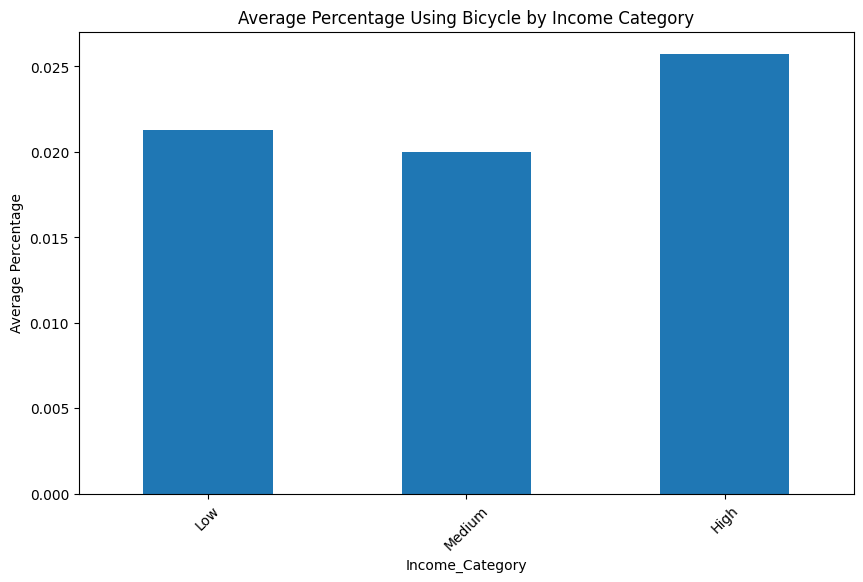

/var/folders/2y/kltst65s5v9_rc09rl3t1z4h0000gn/T/ipykernel_1340/3165666085.py:87: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ax = merged_data.groupby('Income_Category')[perc_column].mean().plot(kind='bar')


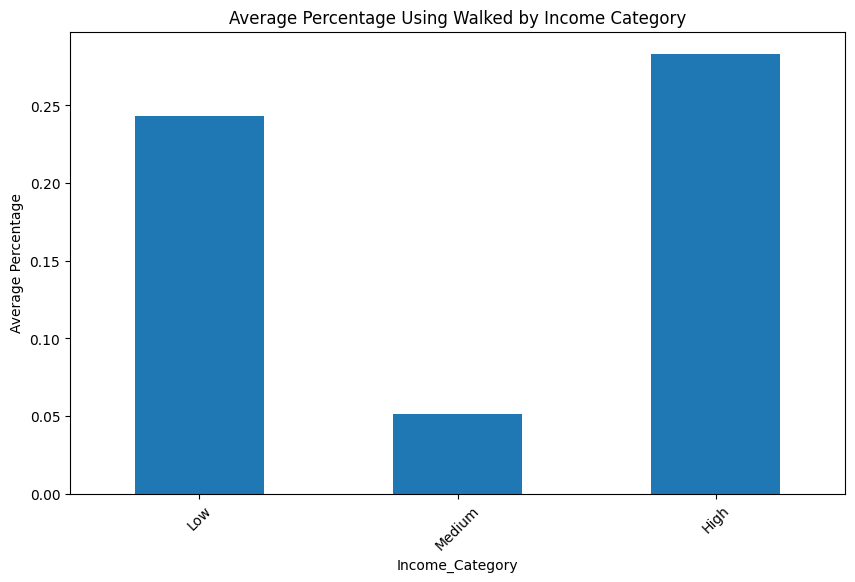

/var/folders/2y/kltst65s5v9_rc09rl3t1z4h0000gn/T/ipykernel_1340/3165666085.py:87: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ax = merged_data.groupby('Income_Category')[perc_column].mean().plot(kind='bar')


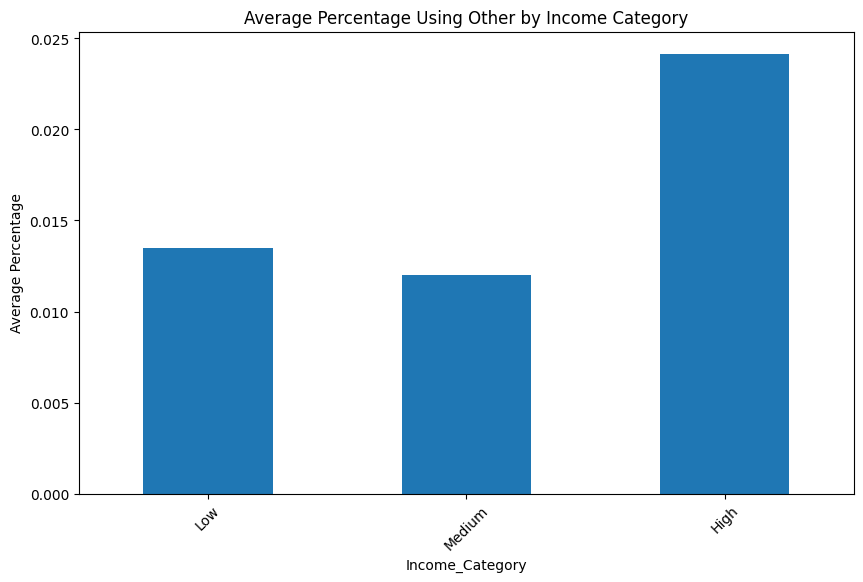

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the income data CSV
income_data_path = 'Book2.csv'  # Adjust the path as necessary
income_data = pd.read_csv(income_data_path)


income_data['Median Income'] = pd.to_numeric(income_data['Median Income'].replace('[\$,]', '', regex=True), errors='coerce')
nan_rows = income_data[income_data['Median Income'].isna()]
# print(nan_rows)
low_income_threshold = 62843
high_income_threshold = 80000

def categorize_income(income):
    if income < low_income_threshold:
        return 'Low'
    elif income < high_income_threshold:
        return 'Medium'
    else:
        return 'High'
    
income_data['Income_Category'] = income_data['Median Income'].apply(categorize_income)


low = []
medium = []
high = []


for index, row in income_data.iterrows():
    if row['Unnamed: 0'] != 'United States' or row['Unnamed: 0'] != 'Massachusetts':
        if row['Income_Category'] == 'Low':
            low.append(row['Unnamed: 0'])
        elif row['Income_Category'] == 'Medium' and row['Unnamed: 0'] != "United States":
            medium.append(row['Unnamed: 0'])
        elif row['Income_Category'] == 'High' and row['Unnamed: 0'] != "Massachusetts":
            high.append(row['Unnamed: 0'])

print(low)
print(medium)
print(high)
# print(low)
# print(medium)
# print(high)
            
income_data.set_index('Unnamed: 0', inplace=True)


commute_datapath = 'means_of_commute.csv'  # Adjust the path as necessary
commute = pd.read_csv(commute_datapath)

# print(commute.columns)
# print(commute.index)

# merged_data = pd.merge(income_data, commute, on='')

merged_data = income_data.join(commute, lsuffix='_income', rsuffix='_commute')

# print(merged_data.columns)


#############

commute_perc = ['%_commute', '%.1_commute', '%.2_commute', '%.3_commute', '%.4_commute',
    '%.5_commute', '%.6_commute', '%.7_commute']
commute_methods = ['Car, truck, or van', 'Bus or trolley bus', 'Streetcar or trolley car', 'Subway or elevated', 'Railroad', 'Bicycle', 'Walked', 'Other']

# for method in commute_methods:
#     perc_column = method + '_perc'  # Adjust if the naming convention differs
#     merged_data[perc_column] = pd.to_numeric(merged_data[perc_column], errors='coerce')


# for method in commute_methods:
#     merged_data.groupby('Income_Category')[method + '_perc'].mean().plot(kind='bar', figsize=(10, 6), title=f'Percentage Using {method} by Income Category')
#     plt.ylabel('Percentage')
#     plt.show()

for column in commute_perc:
    # Remove the percentage sign at the end and divide by 100 to convert to a float percentage
    merged_data[column] = merged_data[column].str.rstrip('%').astype(float) / 100

merged_data['Income_Category'] = pd.Categorical(merged_data['Income_Category'], categories=['Low', 'Medium', 'High'], ordered=True)

for method_name, perc_column in zip(commute_methods, commute_perc):
    plt.figure(figsize=(10, 6))
    ax = merged_data.groupby('Income_Category')[perc_column].mean().plot(kind='bar')
    ax.set_title(f'Average Percentage Using {method_name} by Income Category')
    ax.set_ylabel('Average Percentage')
    plt.xticks(rotation=45)
    plt.show()


# print(merged_data)

### Introduction/Method ###

Displacement comes in many forms, and one of them can come from gentrification of neighborhoods. In theory, gentrification of neighborhoods would cause all sort of economical changes - such as increasing rent and property values, increase in income of residents of that area, or even demographic changes as well. Generally, these are quality indicators of gentrification. With these changes to the neighborhood, it can cause original and often poorer residents to be forced move out due to economic and social pressures, thus displacement. Gentrification can be caused by many different factors, such as improved transportation systems, greenway development, et cetera. To begin, we shall identify potential places that are being gentrified in the Suffolk County, Massachussetts area - and move on our analysis from there.

### Income / Rent Ratio ###

To begin, I have collected data on income and rent data from 2013 to 2022 (in three year intervals), in which both datasets contain data that shows mean rental costs and mean household income based on the census tract.

In [107]:
income_data_2013_path = 'income/2013-income-data.csv'
income_data_2013 = pd.read_csv(income_data_2013_path)
household_data_2013_path = 'rent/2013-rent-data.csv'
household_data_2013 = pd.read_csv(household_data_2013_path)

income_data_2016_path = 'income/2016-income-data.csv'
income_data_2016 = pd.read_csv(income_data_2016_path)
household_data_2016_path = 'rent/2016-rent-data.csv'
household_data_2016 = pd.read_csv(household_data_2016_path)

income_data_2019_path = 'income/2019-income-data.csv'
income_data_2019 = pd.read_csv(income_data_2019_path)
household_data_2019_path = 'rent/2019-rent-data.csv'
household_data_2019 = pd.read_csv(household_data_2019_path)

income_data_2022_path = 'income/2022-income-data.csv'
income_data_2022 = pd.read_csv(income_data_2022_path)
household_data_2022_path = 'rent/2022-rent-data.csv'
household_data_2022 = pd.read_csv(household_data_2022_path)


In [108]:
# Cleaning data + Only extracting relevant columns

income_relevant_columns = ['GEO_ID', 'NAME', 'S1901_C01_012E']

household_relevant_columns = ['GEO_ID', 'DP04_0124E']

income_selected = income_data_2013[income_relevant_columns]
household_selected = household_data_2013[household_relevant_columns]

combined_data_2013 = pd.merge(income_selected, household_selected, on='GEO_ID', how='inner')

combined_data_2013.rename(columns={
    'S1901_C01_012E': 'Median Household Income',
    'DP04_0124E': 'Median Gross Rent'
}, inplace=True)

combined_data_2013 = combined_data_2013.drop(combined_data_2013.index[0])

combined_data_2013['Median Household Income'] = combined_data_2013['Median Household Income'].replace('-', np.nan)
combined_data_2013['Median Gross Rent'] = combined_data_2013['Median Gross Rent'].replace('0', np.nan)
# Drop rows with invalid income
combined_data_2013.dropna(subset=['Median Household Income', 'Median Gross Rent'], inplace=True)

combined_data_2013['Median Gross Rent'] = combined_data_2013['Median Gross Rent'].astype(int)
combined_data_2013['Median Household Income'] = combined_data_2013['Median Household Income'].astype(int)

combined_data_2013.head()

# Adding in Annual Rent based on Median
# Adding income to rent ratio

combined_data_2013['Annual Rent'] = combined_data_2013['Median Gross Rent'] * 12

combined_data_2013['Income to Rent Ratio'] = combined_data_2013['Median Household Income'] / combined_data_2013['Annual Rent']

combined_data_2013.head()

,GEO_ID,NAME,Median Household Income,Median Gross Rent,Annual Rent,Income to Rent Ratio
1,1400000US25025000100,"Census Tract 1, Suffolk County, Massachusetts",54107,1061,12732,4.249686
2,1400000US25025000201,"Census Tract 2.01, Suffolk County, Massachusetts",63784,852,10224,6.238654
3,1400000US25025000202,"Census Tract 2.02, Suffolk County, Massachusetts",51636,941,11292,4.572795
4,1400000US25025000301,"Census Tract 3.01, Suffolk County, Massachusetts",81927,526,6312,12.979563
5,1400000US25025000302,"Census Tract 3.02, Suffolk County, Massachusetts",69384,494,5928,11.704453


In [109]:
household_relevant_columns = ['GEO_ID', 'DP04_0126E']

income_selected = income_data_2016[income_relevant_columns]
household_selected = household_data_2016[household_relevant_columns]

combined_data_2016 = pd.merge(income_selected, household_selected, on='GEO_ID', how='inner')

combined_data_2016.rename(columns={
    'S1901_C01_012E': 'Median Household Income',
    'DP04_0126E': 'Median Gross Rent'
}, inplace=True)

combined_data_2016 = combined_data_2016.drop(combined_data_2016.index[0])

combined_data_2016['Median Household Income'] = combined_data_2016['Median Household Income'].replace('-', np.nan)
combined_data_2016['Median Gross Rent'] = combined_data_2016['Median Gross Rent'].replace('0', np.nan)
# Drop rows with invalid income
combined_data_2016.dropna(subset=['Median Household Income', 'Median Gross Rent'], inplace=True)

combined_data_2016['Median Gross Rent'] = combined_data_2016['Median Gross Rent'].astype(int)
combined_data_2016['Median Household Income'] = combined_data_2016['Median Household Income'].astype(int)

combined_data_2016['Annual Rent'] = combined_data_2016['Median Gross Rent'] * 12

combined_data_2016['Income to Rent Ratio'] = combined_data_2016['Median Household Income'] / combined_data_2016['Annual Rent']

combined_data_2016.head()

,GEO_ID,NAME,Median Household Income,Median Gross Rent,Annual Rent,Income to Rent Ratio
1,1400000US25025000100,"Census Tract 1, Suffolk County, Massachusetts",69818,1082,12984,5.377234
2,1400000US25025000201,"Census Tract 2.01, Suffolk County, Massachusetts",80932,833,9996,8.096439
3,1400000US25025000202,"Census Tract 2.02, Suffolk County, Massachusetts",66875,953,11436,5.847761
4,1400000US25025000301,"Census Tract 3.01, Suffolk County, Massachusetts",86773,607,7284,11.912823
5,1400000US25025000302,"Census Tract 3.02, Suffolk County, Massachusetts",72526,572,6864,10.566142


In [110]:
income_selected = income_data_2019[income_relevant_columns]
household_selected = household_data_2019[household_relevant_columns]

combined_data_2019 = pd.merge(income_selected, household_selected, on='GEO_ID', how='inner')

combined_data_2019.rename(columns={
    'S1901_C01_012E': 'Median Household Income',
    'DP04_0126E': 'Median Gross Rent'
}, inplace=True)

combined_data_2019 = combined_data_2019.drop(combined_data_2019.index[0])

combined_data_2019['Median Household Income'] = combined_data_2019['Median Household Income'].replace('-', np.nan)
combined_data_2019['Median Gross Rent'] = combined_data_2019['Median Gross Rent'].replace('0', np.nan)
# Drop rows with invalid income
combined_data_2019.dropna(subset=['Median Household Income', 'Median Gross Rent'], inplace=True)

combined_data_2019['Median Gross Rent'] = combined_data_2019['Median Gross Rent'].astype(int)
combined_data_2019['Median Household Income'] = combined_data_2019['Median Household Income'].astype(int)

combined_data_2019['Annual Rent'] = combined_data_2019['Median Gross Rent'] * 12

combined_data_2019['Income to Rent Ratio'] = combined_data_2019['Median Household Income'] / combined_data_2019['Annual Rent']

combined_data_2019.head()

,GEO_ID,NAME,Median Household Income,Median Gross Rent,Annual Rent,Income to Rent Ratio
1,1400000US25025000100,"Census Tract 1, Suffolk County, Massachusetts",90980,1533,18396,4.945640
2,1400000US25025000201,"Census Tract 2.01, Suffolk County, Massachusetts",93583,1111,13332,7.019427
3,1400000US25025000202,"Census Tract 2.02, Suffolk County, Massachusetts",79783,1014,12168,6.556788
4,1400000US25025000301,"Census Tract 3.01, Suffolk County, Massachusetts",126845,744,8928,14.207549
5,1400000US25025000302,"Census Tract 3.02, Suffolk County, Massachusetts",101958,580,6960,14.649138


In [146]:
income_selected = income_data_2022[income_relevant_columns]
household_selected = household_data_2022[household_relevant_columns]

combined_data_2022 = pd.merge(income_selected, household_selected, on='GEO_ID', how='inner')

combined_data_2022.rename(columns={
    'S1901_C01_012E': 'Median Household Income',
    'DP04_0126E': 'Median Gross Rent'
}, inplace=True)

combined_data_2022 = combined_data_2022.drop(combined_data_2022.index[0])

combined_data_2022['Median Household Income'] = combined_data_2022['Median Household Income'].replace('-', np.nan)
combined_data_2022['Median Gross Rent'] = combined_data_2022['Median Gross Rent'].replace('0', np.nan)
# Drop rows with invalid income
combined_data_2022.dropna(subset=['Median Household Income', 'Median Gross Rent'], inplace=True)

combined_data_2022['Median Gross Rent'] = combined_data_2022['Median Gross Rent'].astype(int)
combined_data_2022['Median Household Income'] = combined_data_2022['Median Household Income'].astype(int)

combined_data_2022['Annual Rent'] = combined_data_2022['Median Gross Rent'] * 12

combined_data_2022['Income to Rent Ratio'] = combined_data_2022['Median Household Income'] / combined_data_2022['Annual Rent']


In [147]:
# Assuming you have dataframes for each year named similar to combined_data_2013, combined_data_2016, etc.
geo_ids_2013 = set(combined_data_2013['GEO_ID'].unique())
geo_ids_2016 = set(combined_data_2016['GEO_ID'].unique())
geo_ids_2019 = set(combined_data_2019['GEO_ID'].unique())
geo_ids_2022 = set(combined_data_2022['GEO_ID'].unique())

# Find the intersection of all sets
common_geo_ids = geo_ids_2013.intersection(geo_ids_2016, geo_ids_2019, geo_ids_2022)

combined_data_2013 = combined_data_2013[combined_data_2013['GEO_ID'].isin(common_geo_ids)]
combined_data_2016 = combined_data_2016[combined_data_2016['GEO_ID'].isin(common_geo_ids)]
combined_data_2019 = combined_data_2019[combined_data_2019['GEO_ID'].isin(common_geo_ids)]
combined_data_2022 = combined_data_2022[combined_data_2022['GEO_ID'].isin(common_geo_ids)]


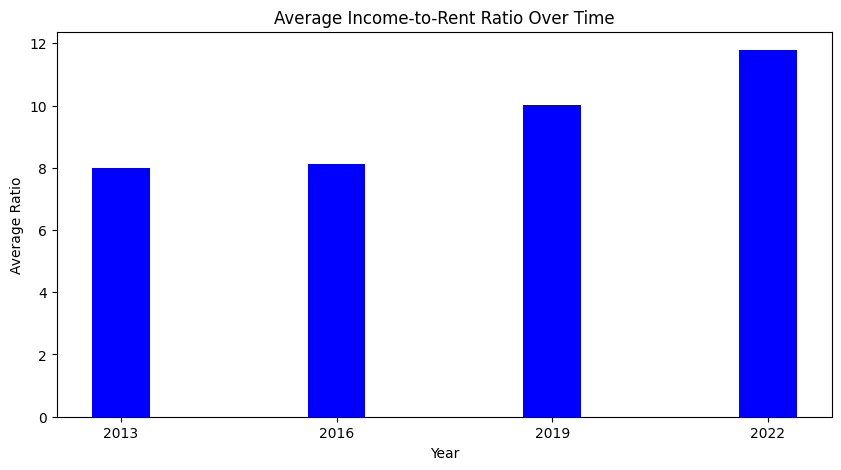

In [167]:
combined_data_2013['Year'] = 2013
combined_data_2016['Year'] = 2016
combined_data_2019['Year'] = 2019
combined_data_2022['Year'] = 2022

all_data = pd.concat([combined_data_2013, combined_data_2016, combined_data_2019, combined_data_2022])

average_ratios = all_data.groupby('Year')['Income to Rent Ratio'].mean().reset_index()

plt.figure(figsize=(10, 5))
plt.bar(average_ratios['Year'], average_ratios['Income to Rent Ratio'], color='blue')
plt.title('Average Income-to-Rent Ratio Over Time')
plt.xlabel('Year')
plt.ylabel('Average Ratio')
plt.xticks(average_ratios['Year'])  # Ensure all years are displayed
plt.show()

The bar chart is a very simplistic way of seeing that over the span of 2013 to 2022, the average income to rent ratio has been increasing -- suggesting that income is growing faster than annual rent. While this suggests that affordability of apartments have improved (relative to resident's income), but this can also indicate that there has been an influx of higher-income residents coming into the Suffolk County in Massachussetts. Potential areas to look at for displacement:
- Demographic changes in these areas, along side with financial data based on demographic
- Create a mapping to show which census has a more severe increase in ratio, and which places have less

While the average of an income to rent ratio of the Suffolk County over a period of time is a good start, it doesn't tell us much. But it gives us a good direction on how we can expand these findings to tell us more about displacement in this area (whether or not it exists or not based on income/rent/gentrification data).

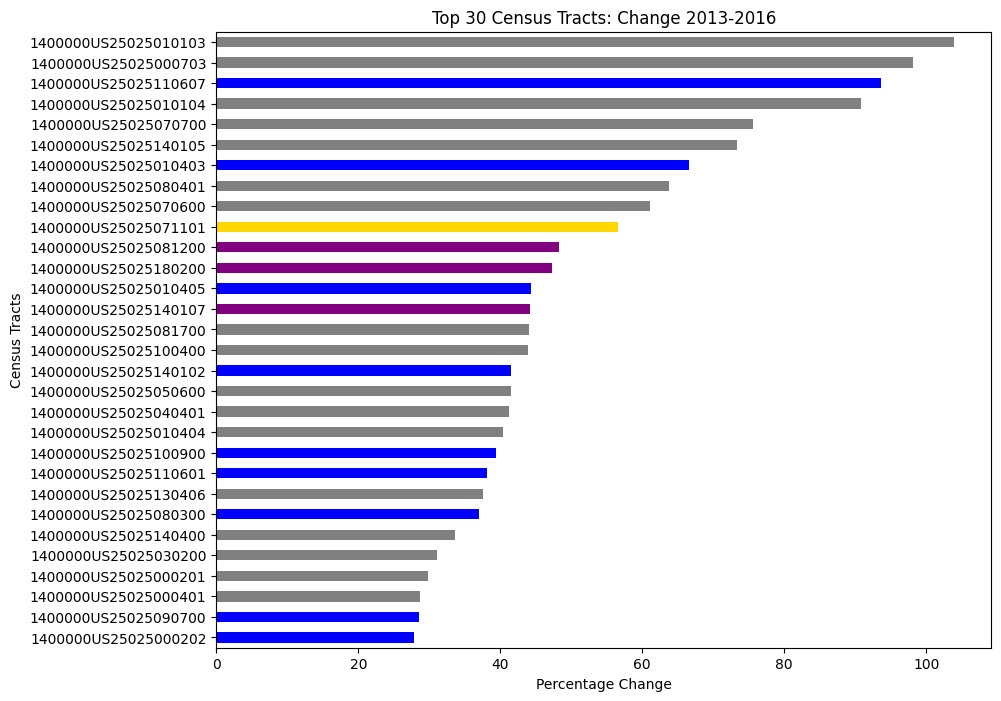

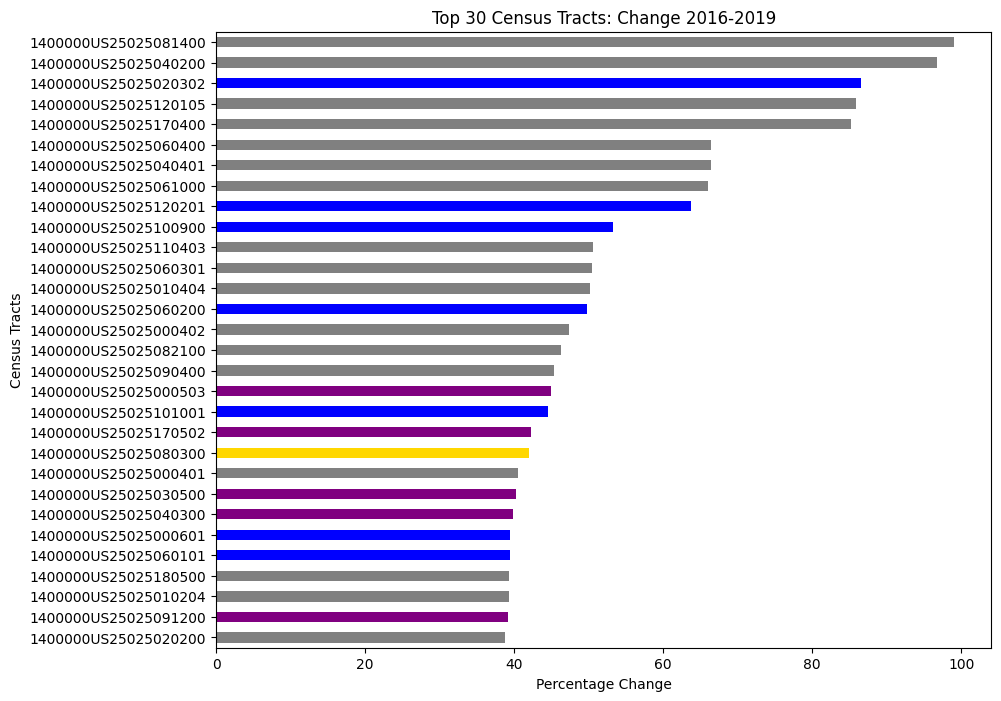

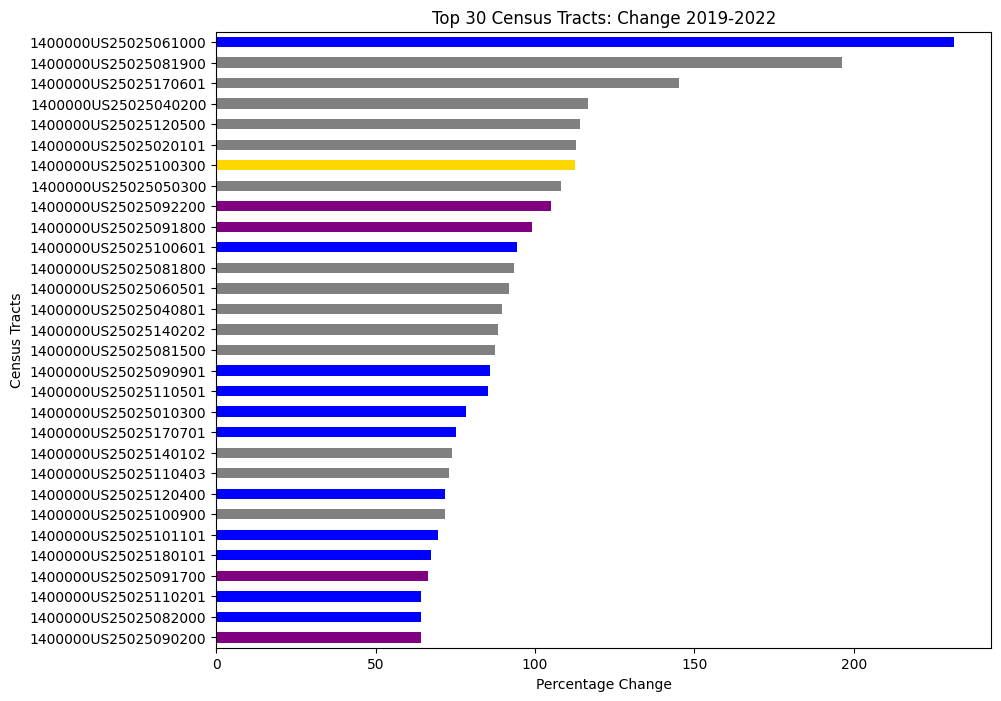

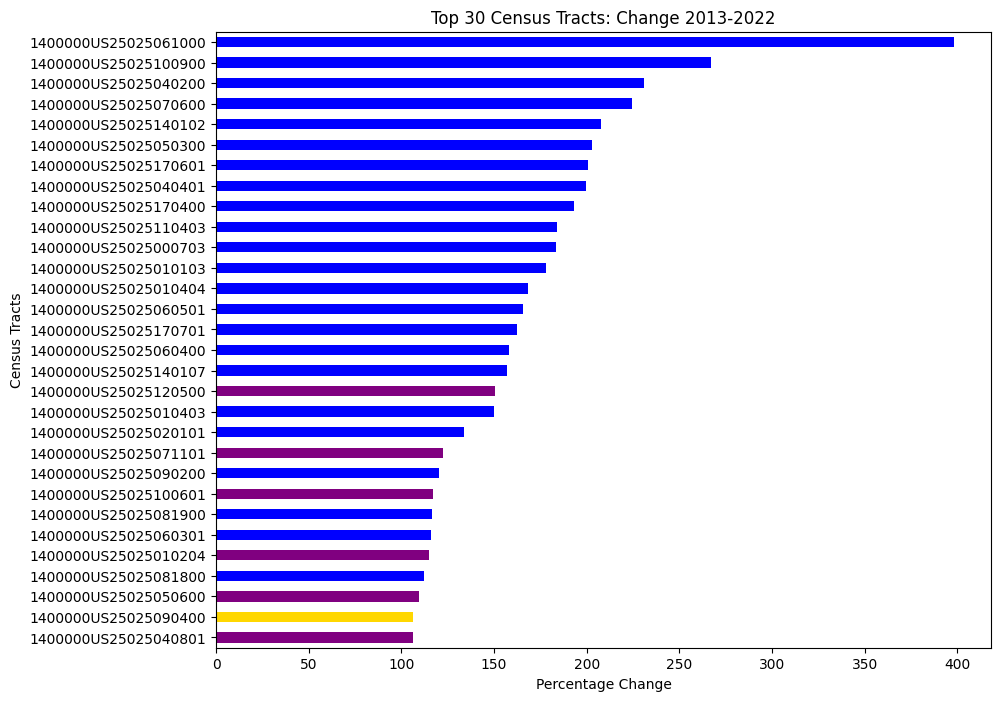

In [172]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_heatmap is your DataFrame from previous steps
# Sorting and selecting the top 30 for each period


def plot_individual_bar_chart(data, title, column):
    plt.figure(figsize=(10, 8))  # Set the size of the figure
    data = data.sort_values(by=column, ascending=True)  # Sort data for a better visual
    data[column].plot(kind='barh', color='skyblue')  # Create a horizontal bar chart
    plt.title(title)
    plt.xlabel('Percentage Change')
    plt.ylabel('Census Tracts')
    plt.show()  # Show the plot

# Assuming df_heatmap is your DataFrame from previous steps

# Sorting and selecting the top 30 for each period
top_tracts_2013_2016 = df_heatmap.sort_values(by='Change 2013-2016', ascending=False).head(30)
top_tracts_2016_2019 = df_heatmap.sort_values(by='Change 2016-2019', ascending=False).head(30)
top_tracts_2019_2022 = df_heatmap.sort_values(by='Change 2019-2022', ascending=False).head(30)
top_tracts_2013_2022 = df_heatmap.sort_values(by='Change 2013-2022', ascending=False).head(30)

tracts_list = [
    top_tracts_2013_2016.index.tolist(),
    top_tracts_2016_2019.index.tolist(),
    top_tracts_2019_2022.index.tolist(),
    top_tracts_2013_2022.index.tolist()
]

# Flatten the list and count occurrences
all_tracts = [tract for sublist in tracts_list for tract in sublist]
tract_counts = pd.Series(all_tracts).value_counts()

# Determine frequency of appearance
tract_frequency = tract_counts.to_frame(name='Frequency')

def assign_color(frequency):
    if frequency == 4:
        return 'gold'  # Appears in all four charts
    elif frequency == 3:
        return 'purple'  # Appears in three charts
    elif frequency == 2:
        return 'blue'  # Appears in two charts
    else:
        return 'grey'  # Appears in one chart

tract_frequency['Color'] = tract_frequency['Frequency'].apply(assign_color)

def plot_colored_bar_chart(data, title, column):
    plt.figure(figsize=(10, 8))
    colors = [tract_frequency.loc[tract, 'Color'] if tract in tract_frequency.index else 'grey' for tract in data.index]
    data[column].sort_values().plot(kind='barh', color=colors)
    plt.title(title)
    plt.xlabel('Percentage Change')
    plt.ylabel('Census Tracts')
    plt.show()


plot_colored_bar_chart(top_tracts_2013_2016, 'Top 30 Census Tracts: Change 2013-2016', 'Change 2013-2016')
plot_colored_bar_chart(top_tracts_2016_2019, 'Top 30 Census Tracts: Change 2016-2019', 'Change 2016-2019')
plot_colored_bar_chart(top_tracts_2019_2022, 'Top 30 Census Tracts: Change 2019-2022', 'Change 2019-2022')
plot_colored_bar_chart(top_tracts_2013_2022, 'Top 30 Census Tracts: Change 2013-2022', 'Change 2013-2022')





Gold = shown up on all four graphs ; Purple = shown up on three graphs ; Blue = shown up on two graphs ; Grey = shown up on one graph \ 
Given these graphs, we can see which census tracts has shown a large change in income to rent ratio. We can see which year period it occured in, and with this information, we can look into these census tracts that can justify the rankings of these percentage changes (rent decrease, influx of high income residents, etc). This gives us more information of which area to look at, as a better future measure of gentrification and how it might indicate displacement (people leaving that area, etc).

Things to look at:
- Demographic changes in these census tracts
- Transportation data on these census tracts